In [2]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy import fftpack
from skimage import io

%matplotlib inline

def read_transform_plot(path):
    
    img = read_img(path)

    # Transforming.
    freq = transform(img)

    # Plotting FFT image.
    plot_both(img, freq)

def read_img(path):
    
    # Reading image file.
    img = io.imread(path).astype(np.float)

    # If RGB image, take only the green channel.
    if len(img.shape) > 2:

        img = img[:,:,1]

    return img

def transform(img):
    
    freq = fftpack.fft2(img)
    
    return freq
    
def plot_freq(freq, title='Fourier Transform'):
    
    plt.figure(figsize=(6, 6))
    plt.imshow(np.fft.fftshift(np.abs(freq)), norm=colors.LogNorm(vmin=5))
    plt.colorbar()
    plt.title(title)
    plt.show()
    
def plot_both(img, freq):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    ax1.imshow(img, norm=colors.Normalize())
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(np.fft.fftshift(np.abs(freq)), norm=colors.LogNorm(vmin=5))
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.show()


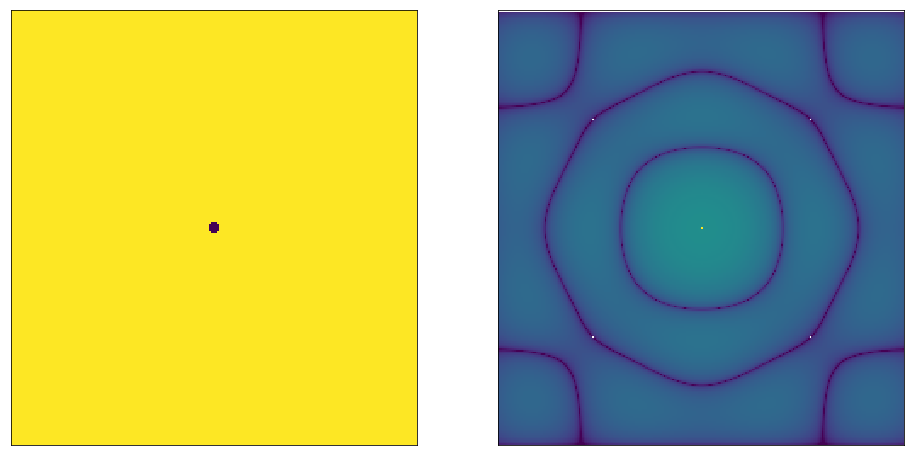

In [3]:
read_transform_plot('images/ball_8.png')

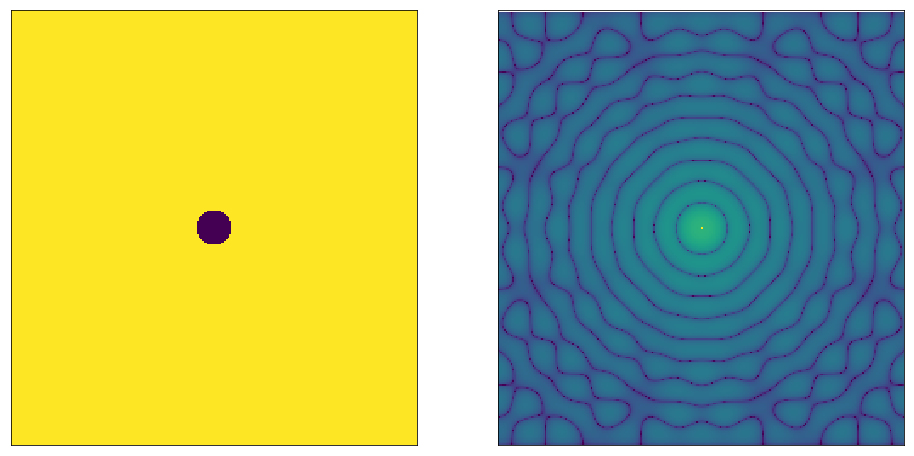

In [4]:
read_transform_plot('images/ball_20.png')

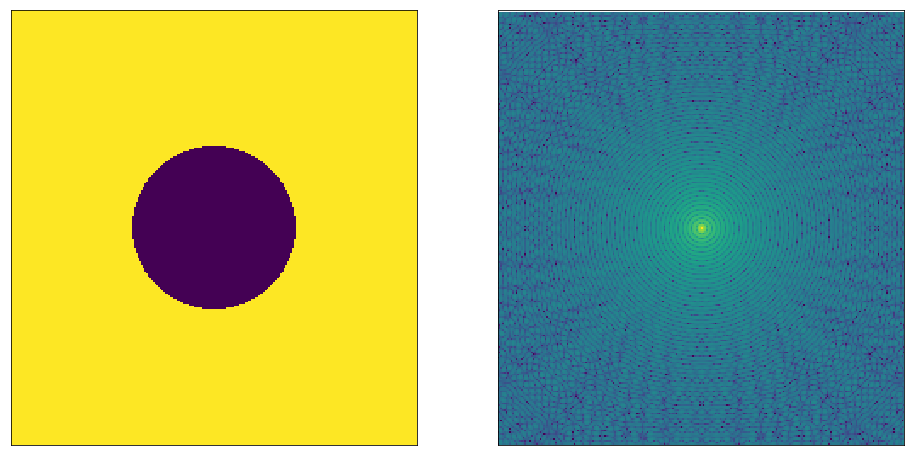

In [5]:
read_transform_plot('images/ball_100.png')

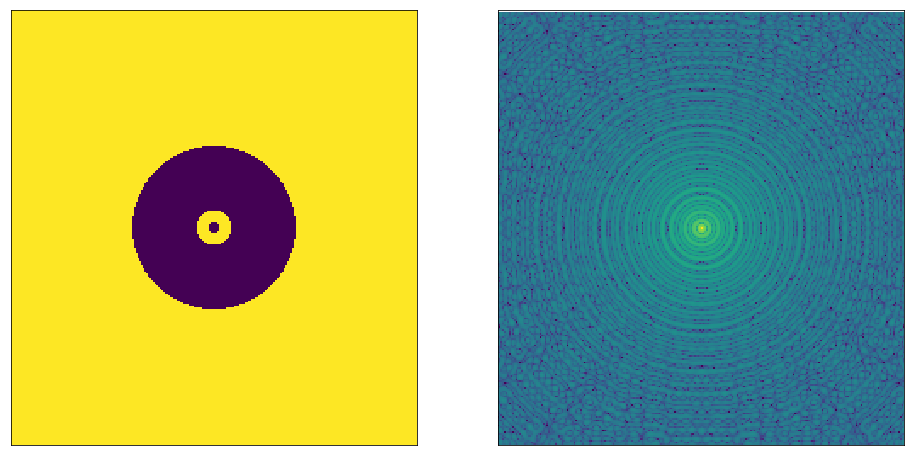

In [6]:
ball008 = read_img('images/ball_8.png')
ball020 = read_img('images/ball_20.png')
ball100 = read_img('images/ball_100.png')

result = ball100 - ball020 + ball008
freq = transform(result)

plot_both(result, freq)

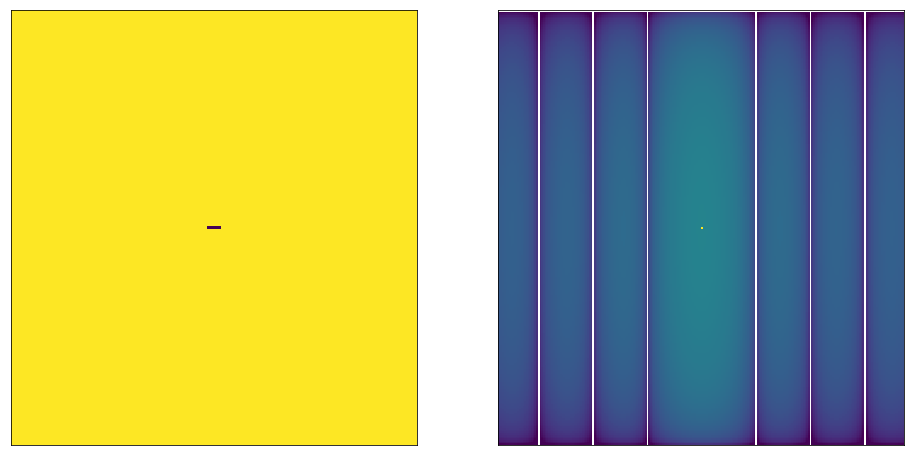

In [7]:
read_transform_plot('images/rectangle_10.png')

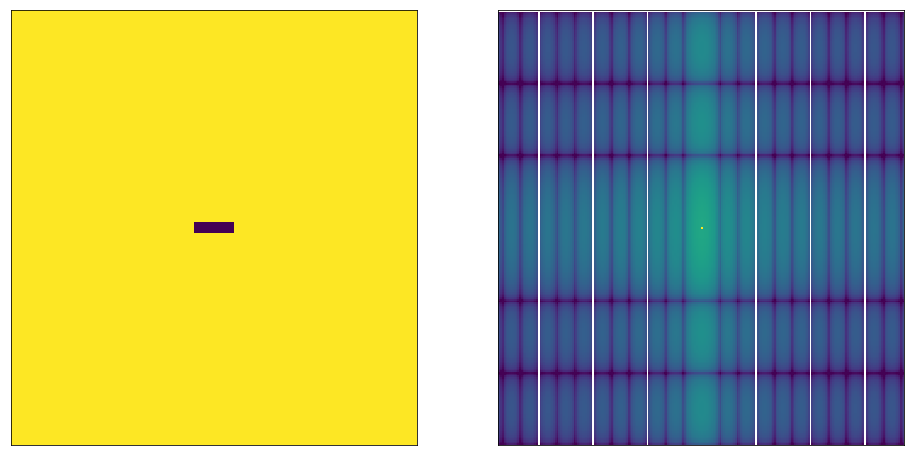

In [8]:
read_transform_plot('images/rectangle_40.png')

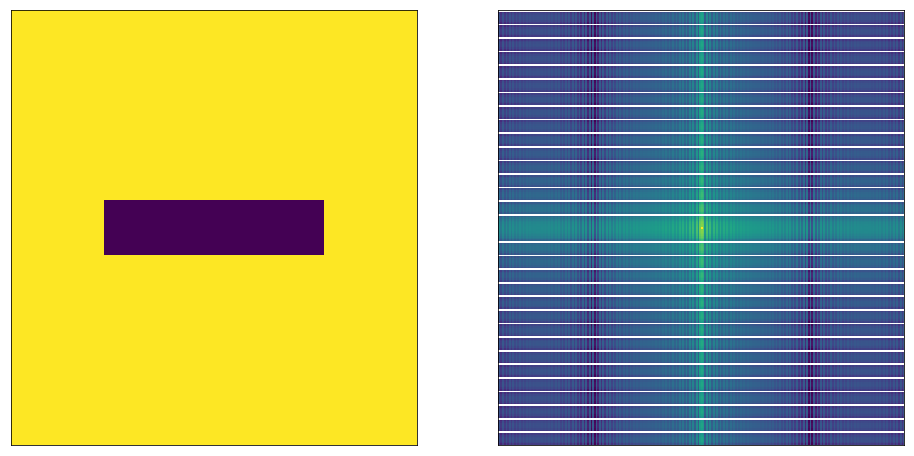

In [9]:
read_transform_plot('images/rectangle_150.png')

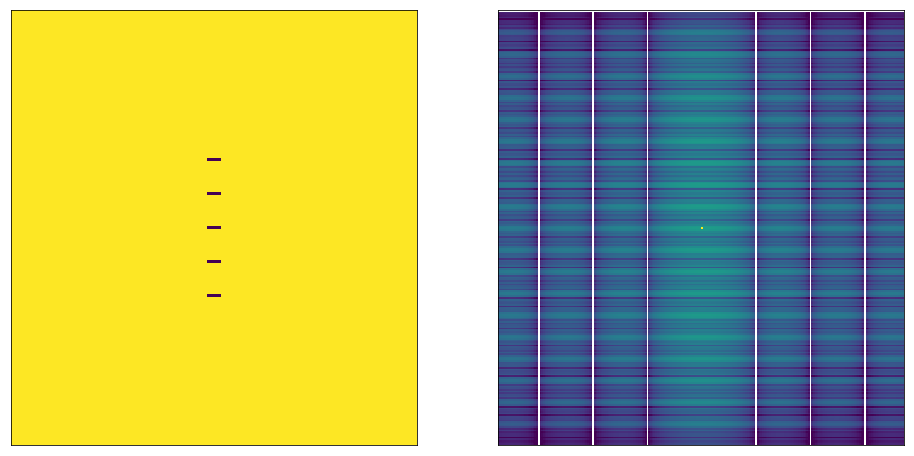

In [10]:
read_transform_plot('images/ticks_10.png')

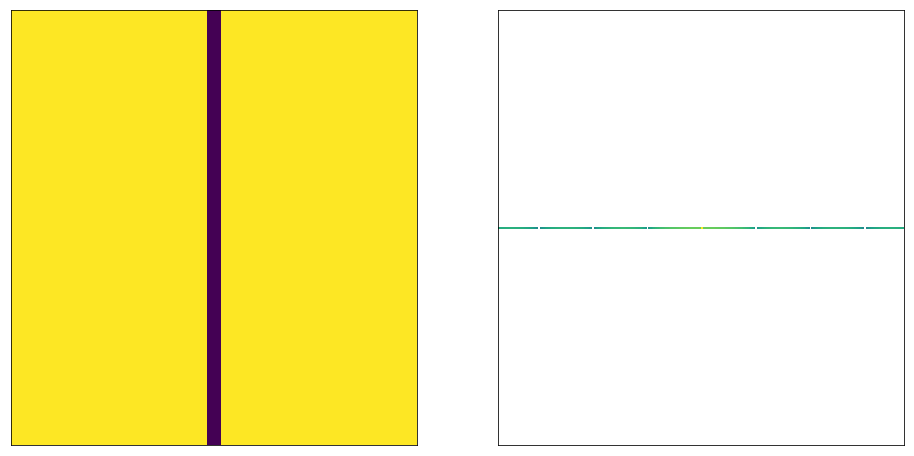

In [11]:
read_transform_plot('images/v_strip_10.png')

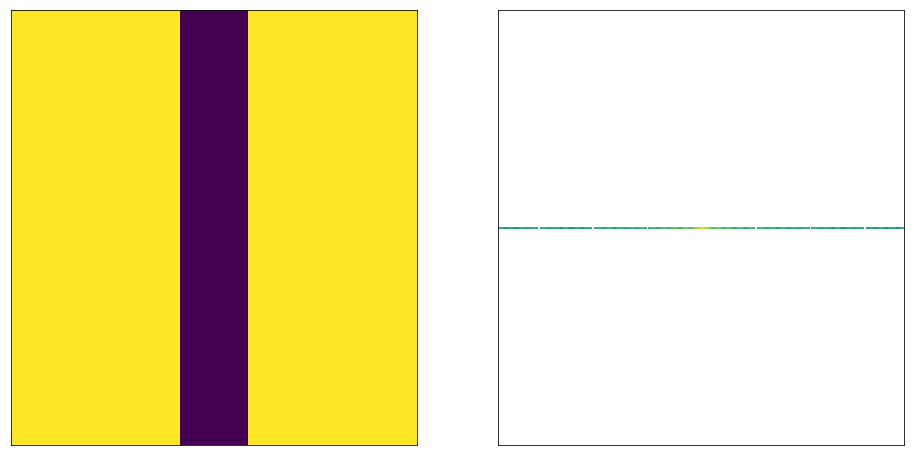

In [12]:
read_transform_plot('images/v_strip_30.png')

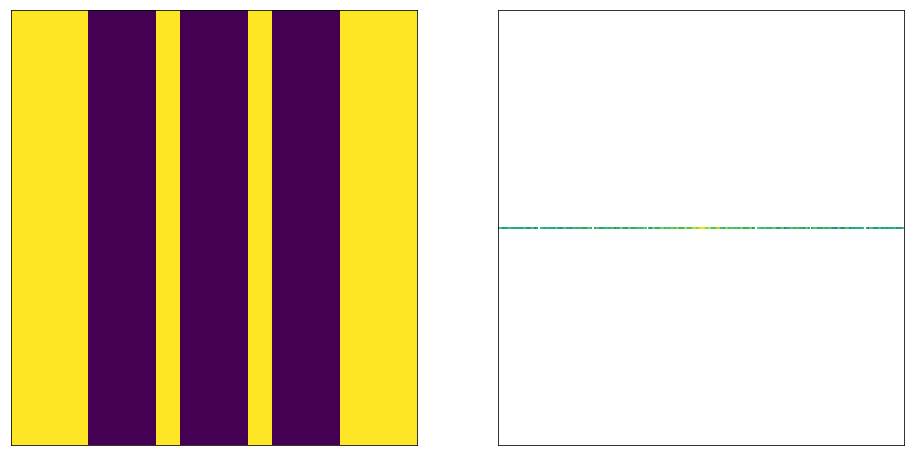

In [13]:
read_transform_plot('images/3_v_strip_30.png')

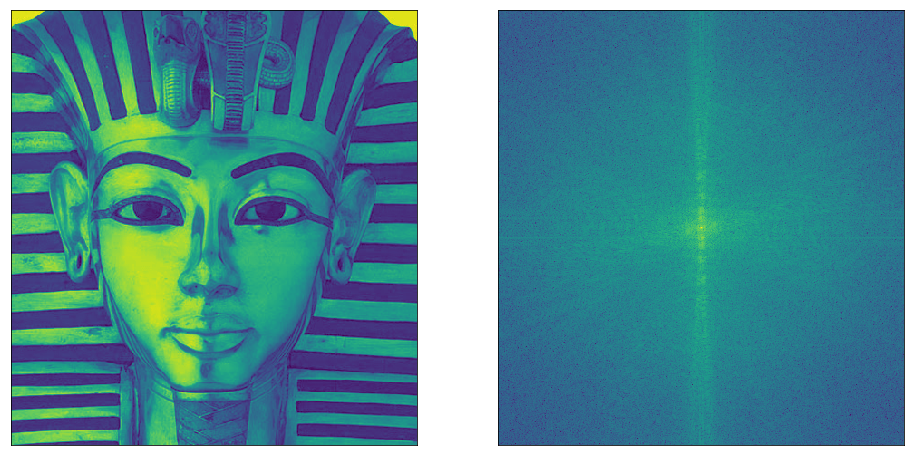

In [14]:
read_transform_plot('images/tutankamon.jpg')

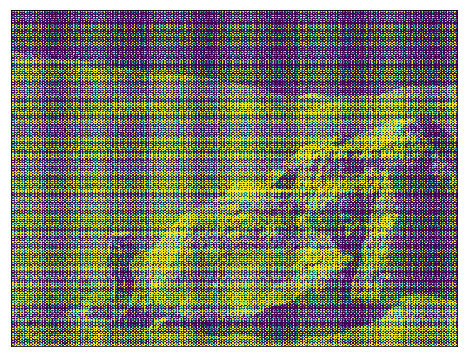

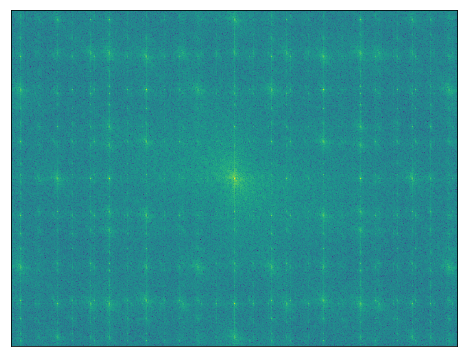

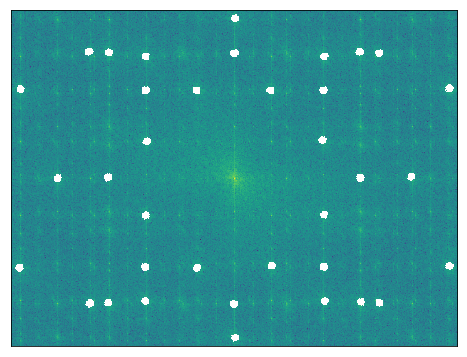

/Users/jefersson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


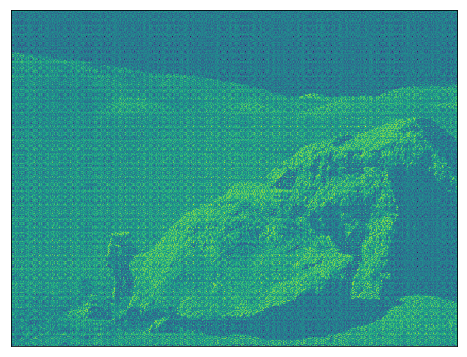

/Users/jefersson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/jefersson/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [15]:
from skimage import io

img = io.imread('images/moonlanding.png')
msk = io.imread('images/moonlanding_mask.png')

if len(msk.shape) > 2:

    msk = msk[:,:,0]

if len(img.shape) > 2:

    img = img[:,:,0]

msk[msk != 0] = 1

freq = fftpack.fft2(img) # Forward transform.
shifted = np.fft.fftshift(freq) # Forward shift.
filtered = shifted * msk # Filtering by mask.
unshifted = np.fft.ifftshift(filtered) # Inverse shift.
recovered = fftpack.ifft2(unshifted) # Inverse transform.

f, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
ax1.imshow(img)
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()
f, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
ax1.imshow(np.abs(shifted), norm=colors.LogNorm(vmin=5))
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()
f, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
ax1.imshow(np.abs(filtered), norm=colors.LogNorm(vmin=5))
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()
f, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharey=True)
ax1.imshow(recovered.astype(np.float), norm=colors.Normalize())
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

out = recovered.astype(np.float)
out = (out - out.min()) / (out.max() - out.min())
io.imsave('images/moonlanding_recovered.png', out)